In [101]:
from matplotlib import pyplot as plt
def line_map(datax,datay,title,xlbl,ylbl):
    plt.figure(figsize=(20, 10))
    plt.plot(datax, datay)
    plt.title(title)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()
def bar_chart(datax,datay,title,xlbl,ylbl):
    plt.figure(figsize=(20, 10))
    plt.bar(datax, datay)
    plt.title(title)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()    
def pie_chart(datax,data_lbl,title):
    plt.figure(figsize=(10, 6))
    plt.pie(datax, labels=data_lbl, autopct='%1.1f%%', startangle=140)   
    plt.title(title)    
    plt.show()  
def histogram_chart(datax,bins,title,xlbl,ylbl):
    plt.figure(figsize=(10, 6))
    plt.hist(datax, bins=bins, edgecolor='black')  # Bins có thể được điều chỉnh theo yêu cầu
    plt.title(title)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.grid(True)
    plt.show()

In [4]:
import numpy as np
import pandas as pd



In [10]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
temperature = [22, 21, 23, 24, 26, 25, 27]
df=pd.DataFrame({'Days':days,'Temp': temperature})
df

,Days,Temp
0,Mon,22
1,Tue,21
2,Wed,23
3,Thu,24
4,Fri,26
5,Sat,25
6,Sun,27


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Days    7 non-null      object
 1   Temp    7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


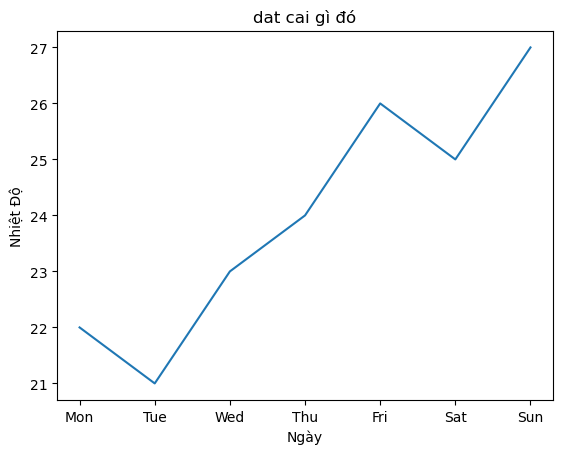

In [14]:
line_map(df['Days'],df['Temp'],'dat cai gì đó','Ngày','Nhiệt Độ')

In [55]:
data=pd.read_csv('train1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9802 non-null   int64  
 1   Order ID       9802 non-null   object 
 2   Order Date     9802 non-null   object 
 3   Ship Date      9802 non-null   object 
 4   Ship Mode      9802 non-null   object 
 5   Customer ID    9802 non-null   object 
 6   Customer Name  9802 non-null   object 
 7   Segment        9802 non-null   object 
 8   Country        9802 non-null   object 
 9   City           9802 non-null   object 
 10  State          9802 non-null   object 
 11  Postal Code    9791 non-null   float64
 12  Region         9802 non-null   object 
 13  Product ID     9802 non-null   object 
 14  Category       9802 non-null   object 
 15  Sub-Category   9802 non-null   object 
 16  Product Name   9802 non-null   object 
 17  Sales          9802 non-null   float64
dtypes: float

In [26]:
# lay Order Date va Sales, Sum giá trị Sales theo Order Date
#chuyen doi cot Order Date thành Datetime
data['Order Date']=pd.to_datetime(data['Order Date'],format='%d/%m/%Y')# định dạng ngày tháng theo : dd/MM/yyyy
#data.head()
#data.info()
df1=data.groupby('Order Date')['Sales'].sum().reset_index()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  1230 non-null   datetime64[ns]
 1   Sales       1230 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.3 KB


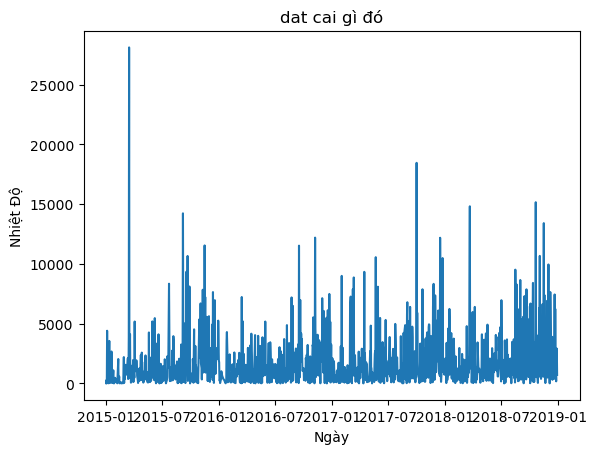

In [27]:
line_map(df1['Order Date'],df1['Sales'],'dat cai gì đó','Ngày','Nhiệt Độ') # theo thang , theo quy theo nam

In [28]:
data['Year Month'] = data['Order Date'].apply(lambda x: x.strftime('%Y-%m'))  # theo nam
df2 = pd.DataFrame(data.groupby('Year Month')['Sales'].sum().reset_index())
df2.head(5)

,Year Month,Sales
0,2015-01,14205.707
1,2015-02,4519.892
2,2015-03,55205.797
3,2015-04,27906.855
4,2015-05,23644.303


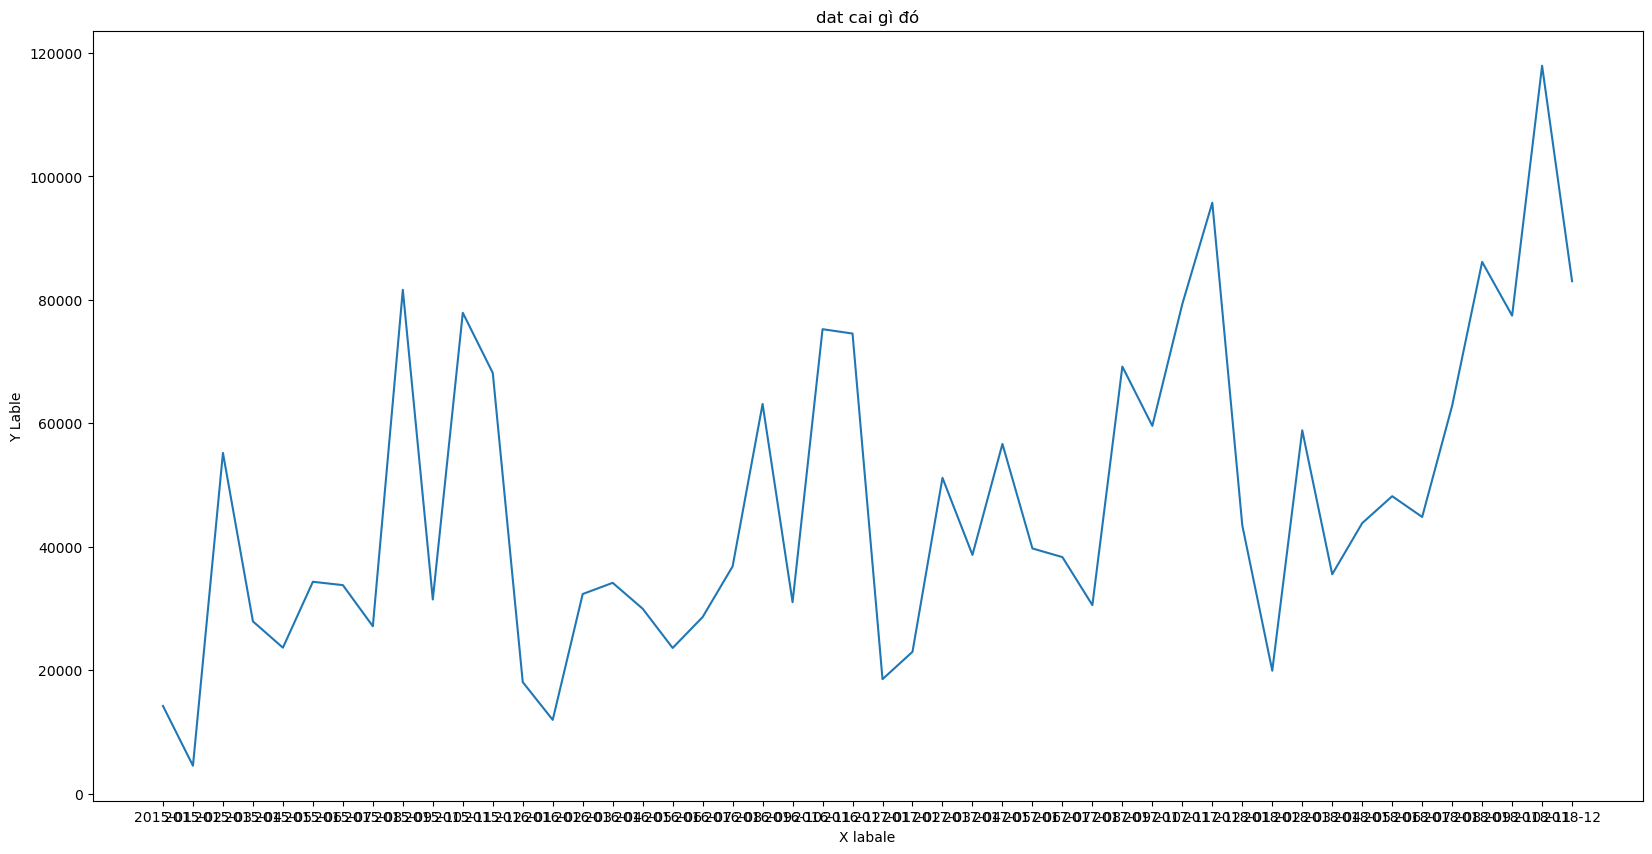

In [32]:
line_map(df2['Year Month'],df2['Sales'],'dat cai gì đó','X labale','Y Lable')

In [34]:
data['Year Quarter'] = data['Order Date'].dt.to_period('Q')
df3= pd.DataFrame(data.groupby('Year Quarter')['Sales'].sum().reset_index())
df3.head(5)

,Year Quarter,Sales
0,2015Q1,73931.3960
1,2015Q2,85874.0936
2,2015Q3,142522.6063
3,2015Q4,177528.1122
4,2016Q1,62357.6870


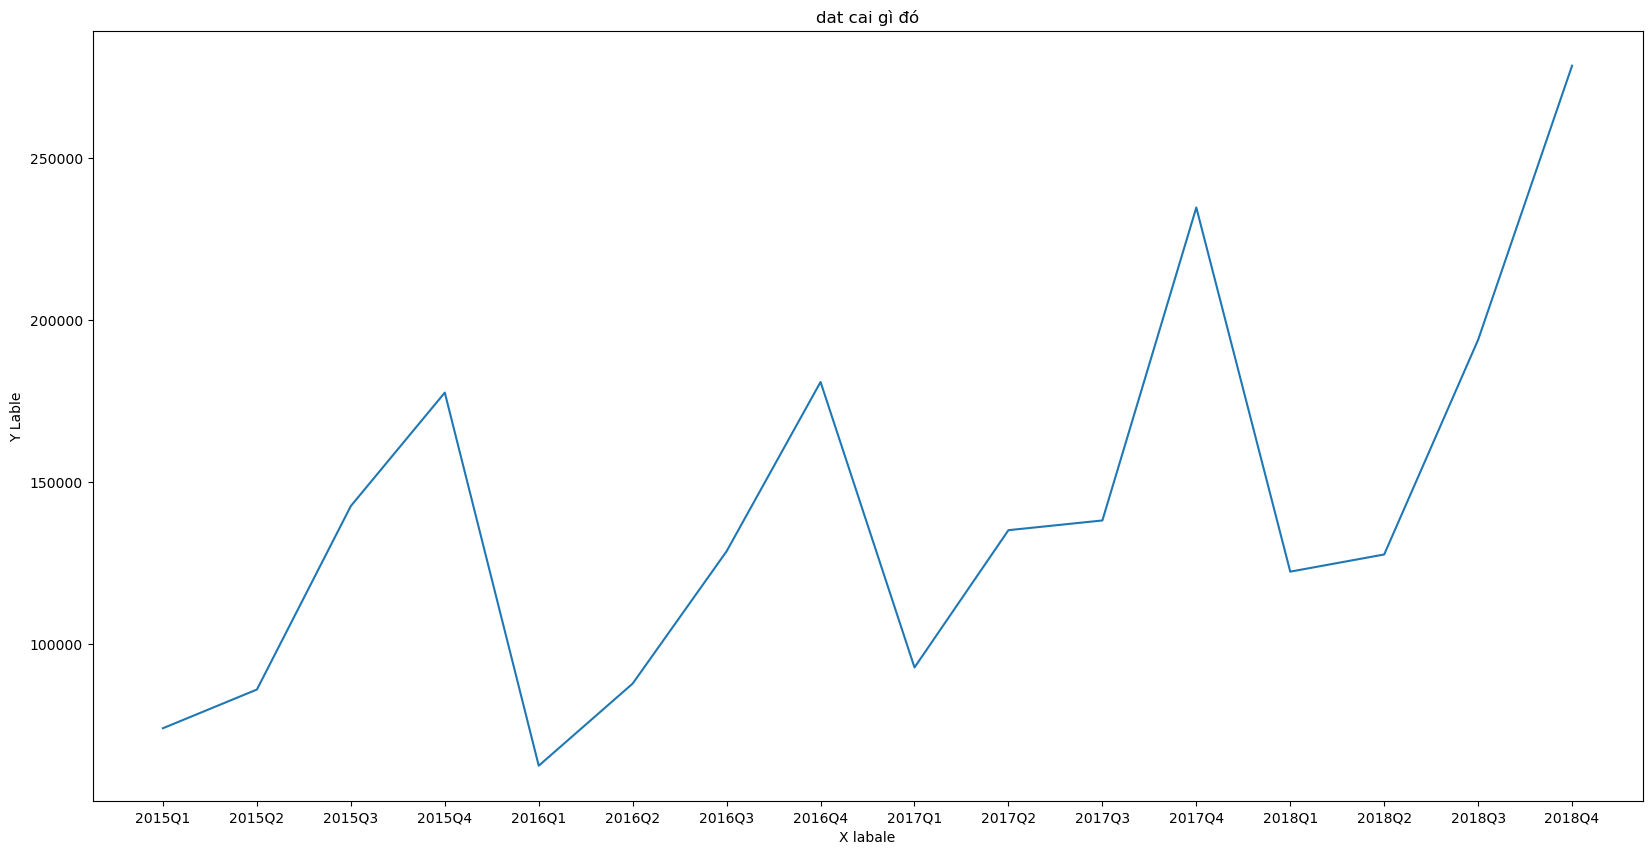

In [36]:
line_map(df3['Year Quarter'].astype(str),df3['Sales'],'dat cai gì đó','X labale','Y Lable')

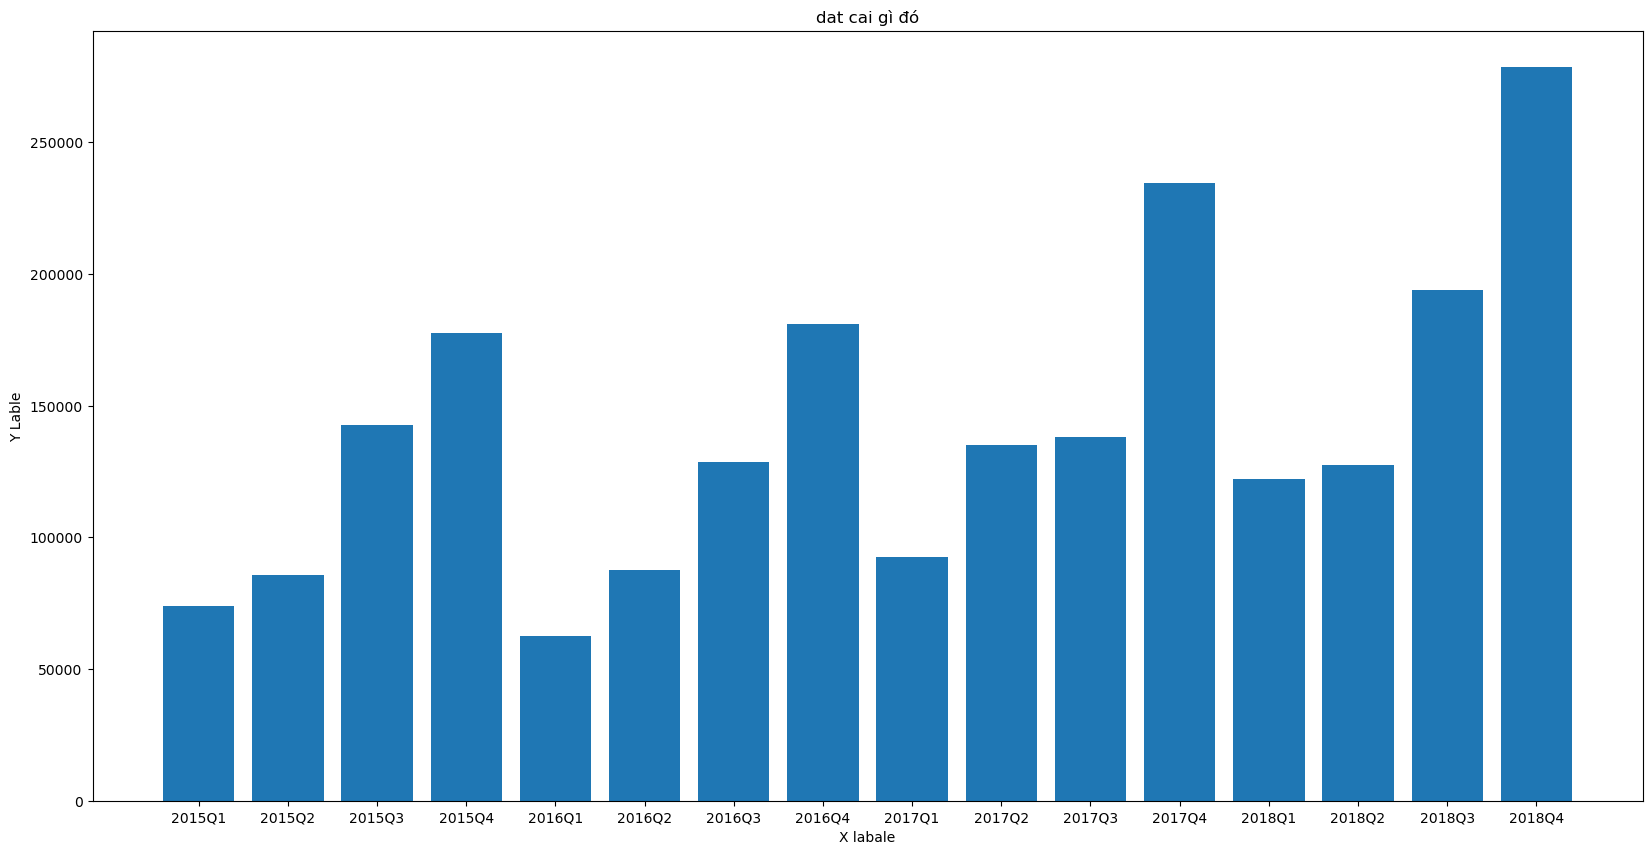

In [39]:
bar_chart(df3['Year Quarter'].astype(str),df3['Sales'],'dat cai gì đó','X labale','Y Lable')

In [40]:
data['Year'] = data['Order Date'].dt.year
df4 = data.groupby('Year')['Sales'].sum().reset_index()
df4

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600454.5100
3,2018,722066.7792


In [50]:
kpi_data = pd.DataFrame({
    'Year': [2015, 2016,2017,2018],
    'KPI': [450000, 500000,550000,620000]
})
# Kết hợp doanh số theo năm và KPI
df4_end = pd.merge(df4, kpi_data, on='Year')
df4_end

,Year,Sales,KPI
0,2015,479856.2081,450000
1,2016,459436.0054,500000
2,2017,600454.5100,550000
3,2018,722066.7792,620000


In [53]:
import locale
# Thiết lập locale để định dạng tiền tệ
locale.setlocale(locale.LC_ALL, '')
# Hiển thị giá trị trên đầu mỗi cột
def autolabel(bars,ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(locale.currency(height, grouping=True)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
def bar_multi_chart(df_combined):
    # Tạo vị trí cho các cột
    x = np.arange(len(df_combined['Year']))

    # Chiều rộng của mỗi cột
    width = 0.35
    # Vẽ biểu đồ bar
    fig, ax = plt.subplots(figsize=(10, 6))

    # Cột doanh số
    bars1 = ax.bar(x - width/2, df_combined['Sales'], width, label='Sales')

    # Cột KPI
    bars2 = ax.bar(x + width/2, df_combined['KPI'], width, label='KPI')

    # Thêm tiêu đề và nhãn trục
    ax.set_title('Yearly Sales and KPI')
    ax.set_xlabel('Year')
    ax.set_ylabel('Amount')
    ax.set_xticks(x)
    ax.set_xticklabels(df_combined['Year'])
    ax.legend()    
    autolabel(bars1,ax)
    autolabel(bars2,ax)
    plt.tight_layout()
    plt.show()

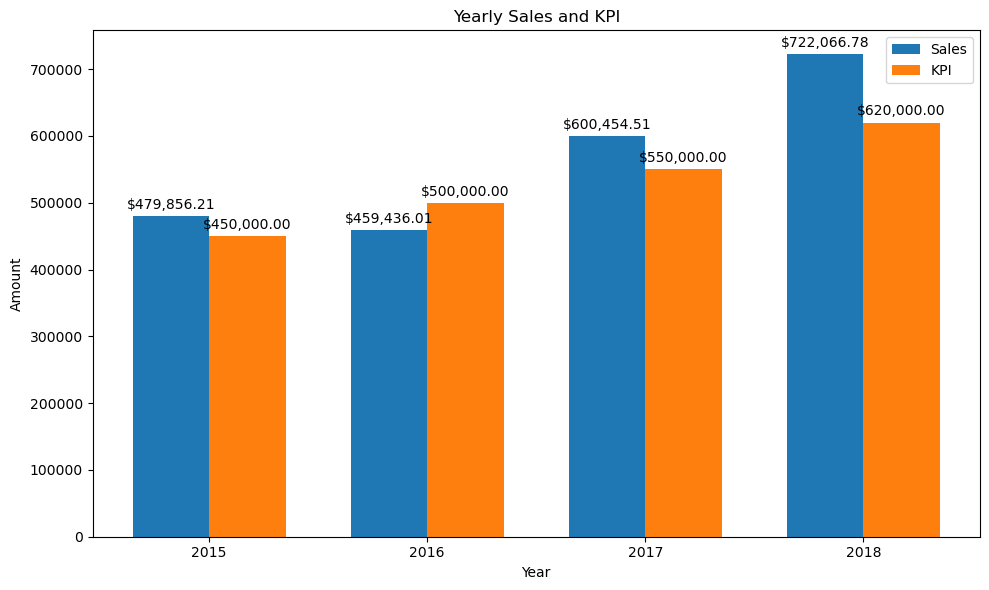

In [54]:
bar_multi_chart(df4_end)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9802 non-null   int64  
 1   Order ID       9802 non-null   object 
 2   Order Date     9802 non-null   object 
 3   Ship Date      9802 non-null   object 
 4   Ship Mode      9802 non-null   object 
 5   Customer ID    9802 non-null   object 
 6   Customer Name  9802 non-null   object 
 7   Segment        9802 non-null   object 
 8   Country        9802 non-null   object 
 9   City           9802 non-null   object 
 10  State          9802 non-null   object 
 11  Postal Code    9791 non-null   float64
 12  Region         9802 non-null   object 
 13  Product ID     9802 non-null   object 
 14  Category       9802 non-null   object 
 15  Sub-Category   9802 non-null   object 
 16  Product Name   9802 non-null   object 
 17  Sales          9802 non-null   float64
dtypes: float

In [60]:
#tinh doanh thu theo thành phố
df5=data.groupby('Region')['Sales'].sum().reset_index()
df5

,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389428.1790
3,West,710219.6845


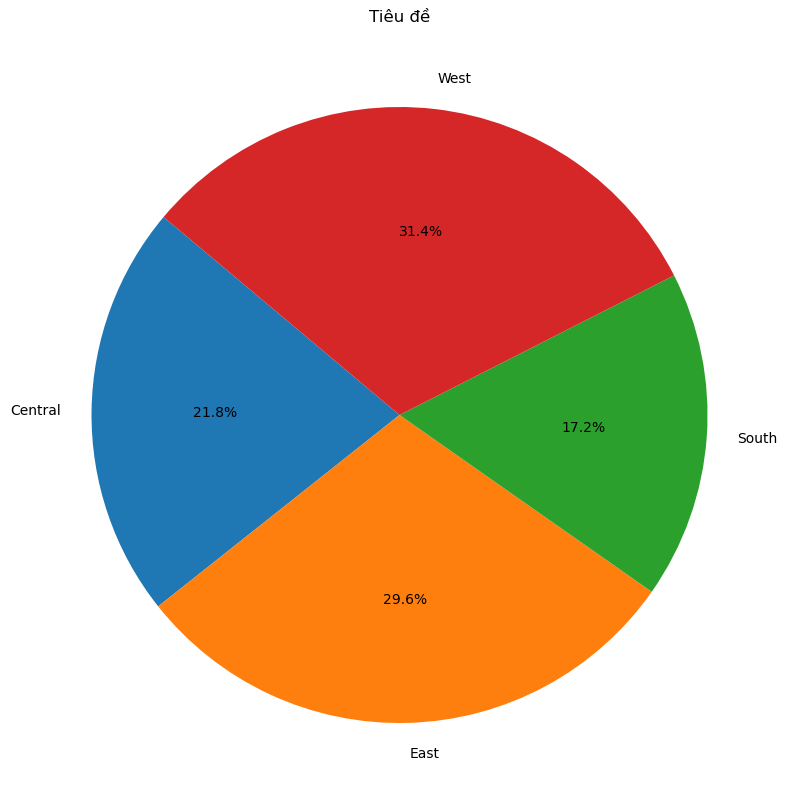

In [62]:
pie_chart(df5['Sales'],df5['Region'],'Tiêu đề')

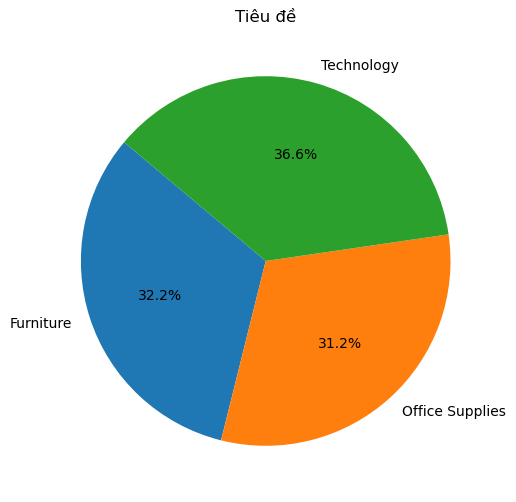

In [67]:
df6=data.groupby('Category')['Sales'].sum().reset_index()
df6
pie_chart(df6['Sales'],df6['Category'],'Tiêu đề')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9802 non-null   int64  
 1   Order ID       9802 non-null   object 
 2   Order Date     9802 non-null   object 
 3   Ship Date      9802 non-null   object 
 4   Ship Mode      9802 non-null   object 
 5   Customer ID    9802 non-null   object 
 6   Customer Name  9802 non-null   object 
 7   Segment        9802 non-null   object 
 8   Country        9802 non-null   object 
 9   City           9802 non-null   object 
 10  State          9802 non-null   object 
 11  Postal Code    9791 non-null   float64
 12  Region         9802 non-null   object 
 13  Product ID     9802 non-null   object 
 14  Category       9802 non-null   object 
 15  Sub-Category   9802 non-null   object 
 16  Product Name   9802 non-null   object 
 17  Sales          9802 non-null   float64
dtypes: float

In [104]:
df7=data.groupby('City')['Sales'].sum().reset_index()
df7=df7.sort_values(by='Sales',ascending=False)
df7=df7[df7['Sales']<500000]
df7

,City,Sales
327,New York City,252462.547
265,Los Angeles,173420.181
450,Seattle,116106.322
436,San Francisco,109041.120
372,Philadelphia,108841.749
...,...,...
352,Ormond Beach,2.808
368,Pensacola,2.214
221,Jupiter,2.064
140,Elyria,1.824


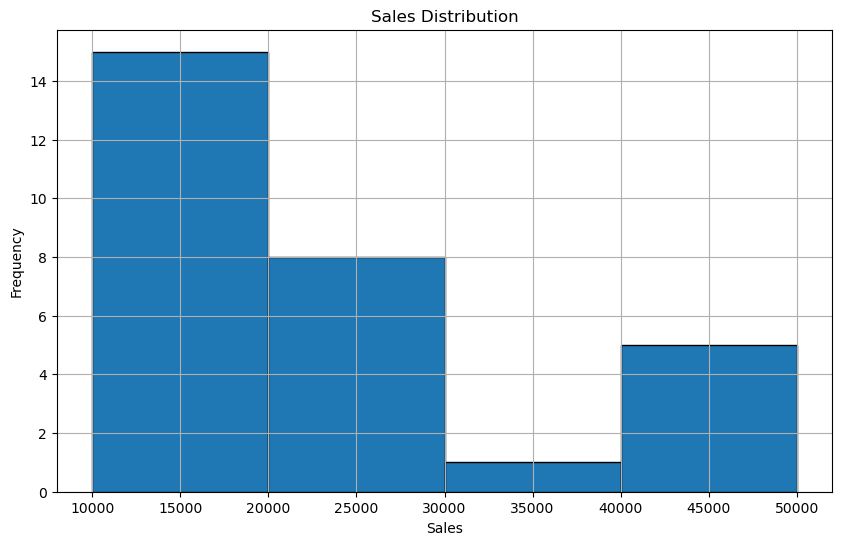

In [112]:
# Vẽ biểu đồ Hitogram
bins=[10000,20000,30000,40000,50000]  ## bins=5 bin='auto'
histogram_chart(df7['Sales'],bins,'Sales Distribution','Sales','Frequency')

In [98]:

df8=data.groupby('Ship Mode').count().reset_index()
df8

,Ship Mode,Row ID,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,First Class,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501
1,Same Day,538,538,538,538,538,538,538,538,538,538,538,538,538,538,538,538,538
2,Second Class,1903,1903,1903,1903,1903,1903,1903,1903,1903,1903,1902,1903,1903,1903,1903,1903,1903
3,Standard Class,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860,5850,5860,5860,5860,5860,5860,5860


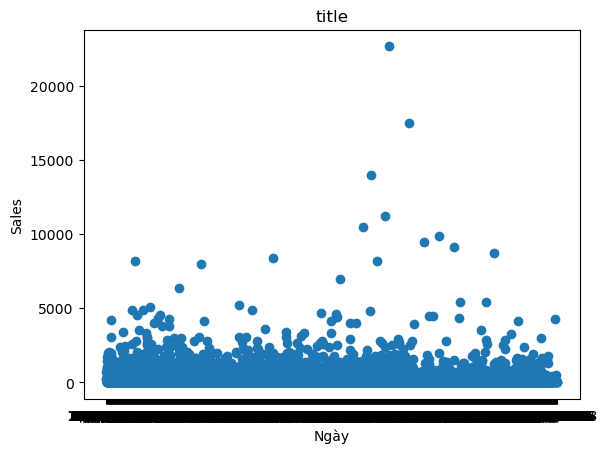

In [115]:


plt.scatter(data['Order Date'], data['Sales'])
plt.title('title')
plt.xlabel('Ngày')
plt.ylabel('Sales')
plt.show()

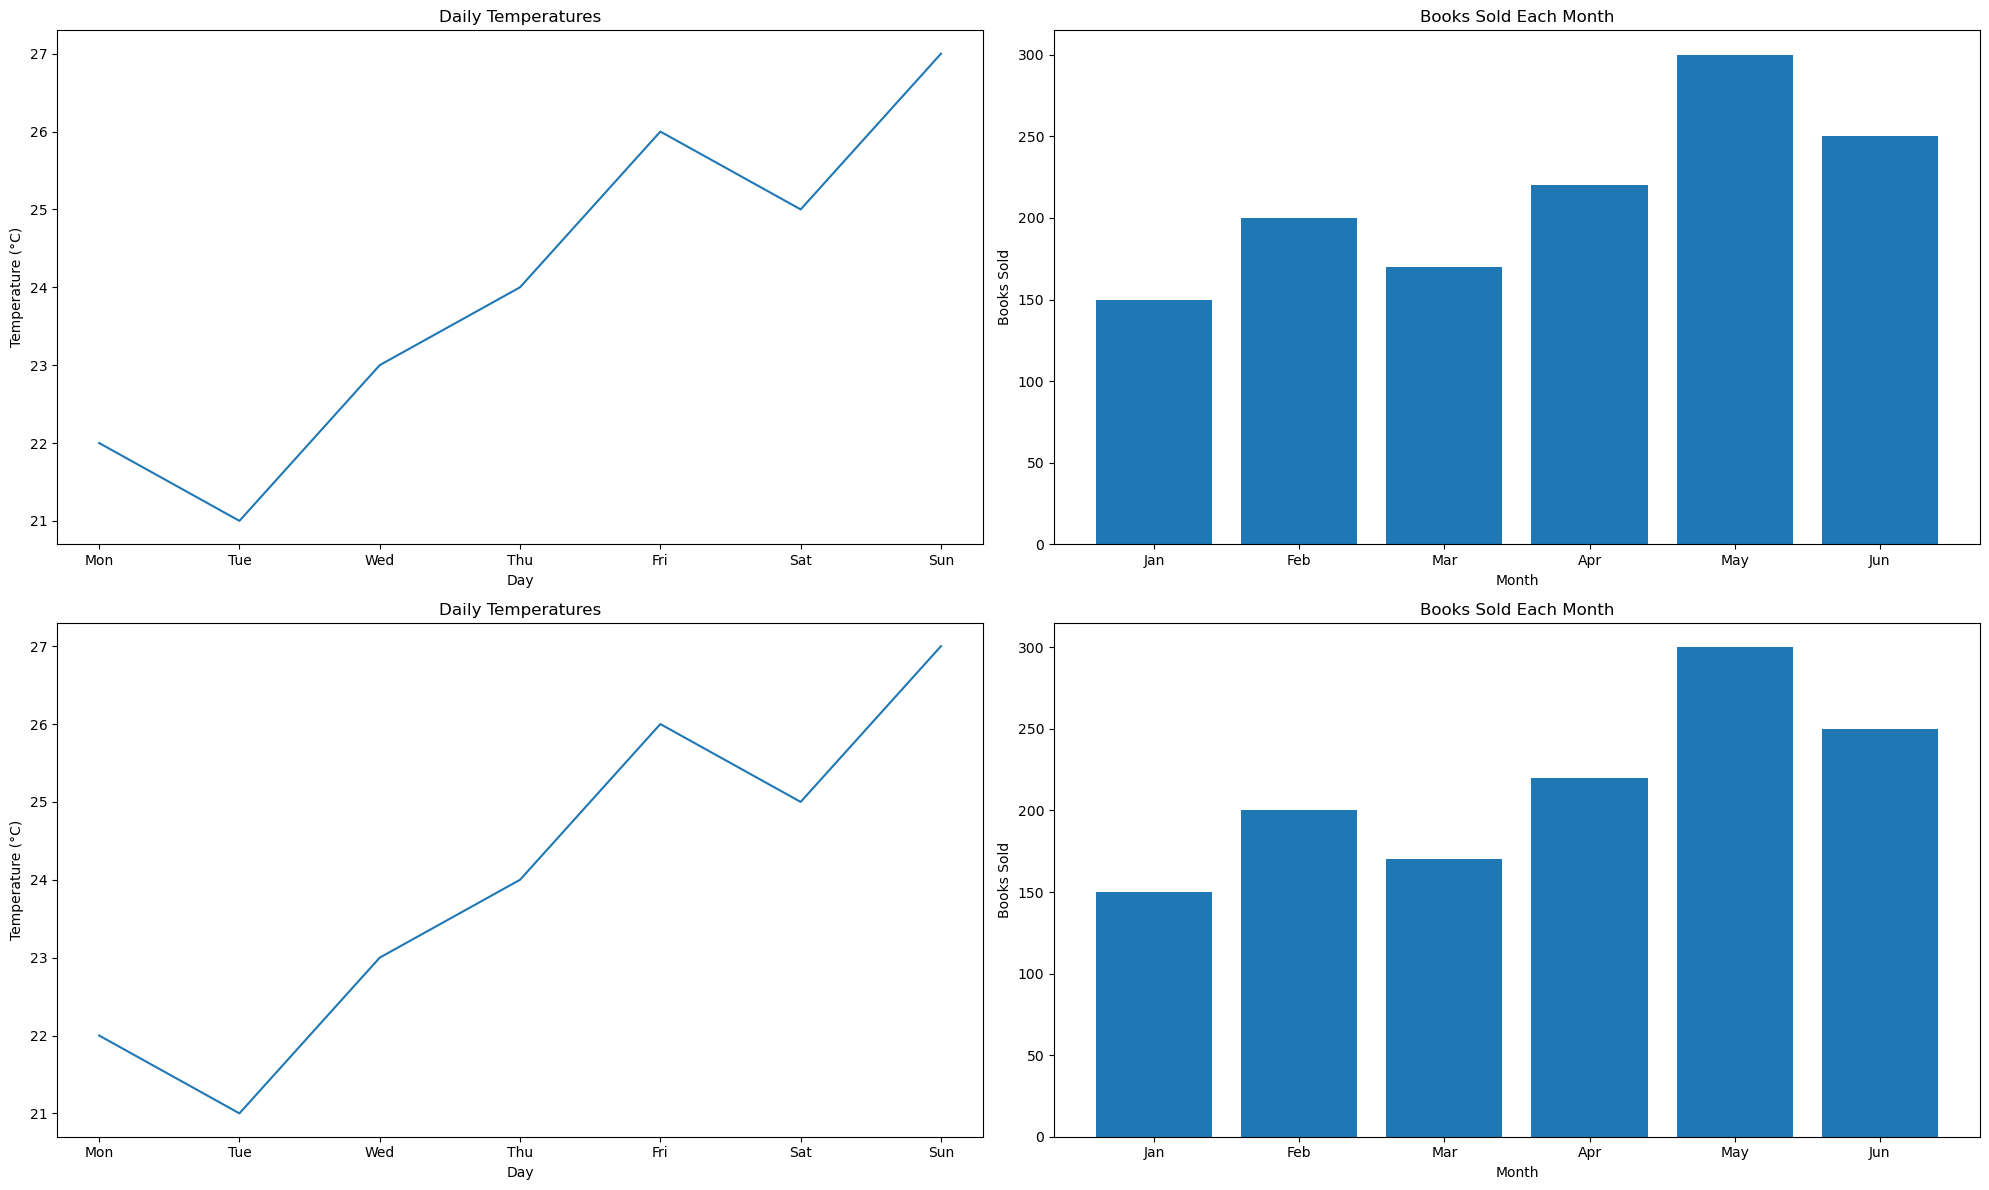

In [133]:
fig, ((ax1, ax2), (ax3, ax4)) =plt.subplots(2,2,figsize=(20, 12))

# Biểu đồ đường
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
temperature = [22, 21, 23, 24, 26, 25, 27]
ax1.plot(days, temperature)
ax1.set_title('Daily Temperatures')
ax1.set_xlabel('Day')
ax1.set_ylabel('Temperature (°C)')

# Biểu đồ cột
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
books_sold = [150, 200, 170, 220, 300, 250]
ax2.bar(months, books_sold)
ax2.set_title('Books Sold Each Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Books Sold')

# Biểu đồ đường
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
temperature = [22, 21, 23, 24, 26, 25, 27]
ax3.plot(days, temperature)
ax3.set_title('Daily Temperatures')
ax3.set_xlabel('Day')
ax3.set_ylabel('Temperature (°C)')

# Biểu đồ cột
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
books_sold = [150, 200, 170, 220, 300, 250]
ax4.bar(months, books_sold)
ax4.set_title('Books Sold Each Month')
ax4.set_xlabel('Month')
ax4.set_ylabel('Books Sold')

plt.tight_layout()
plt.show()

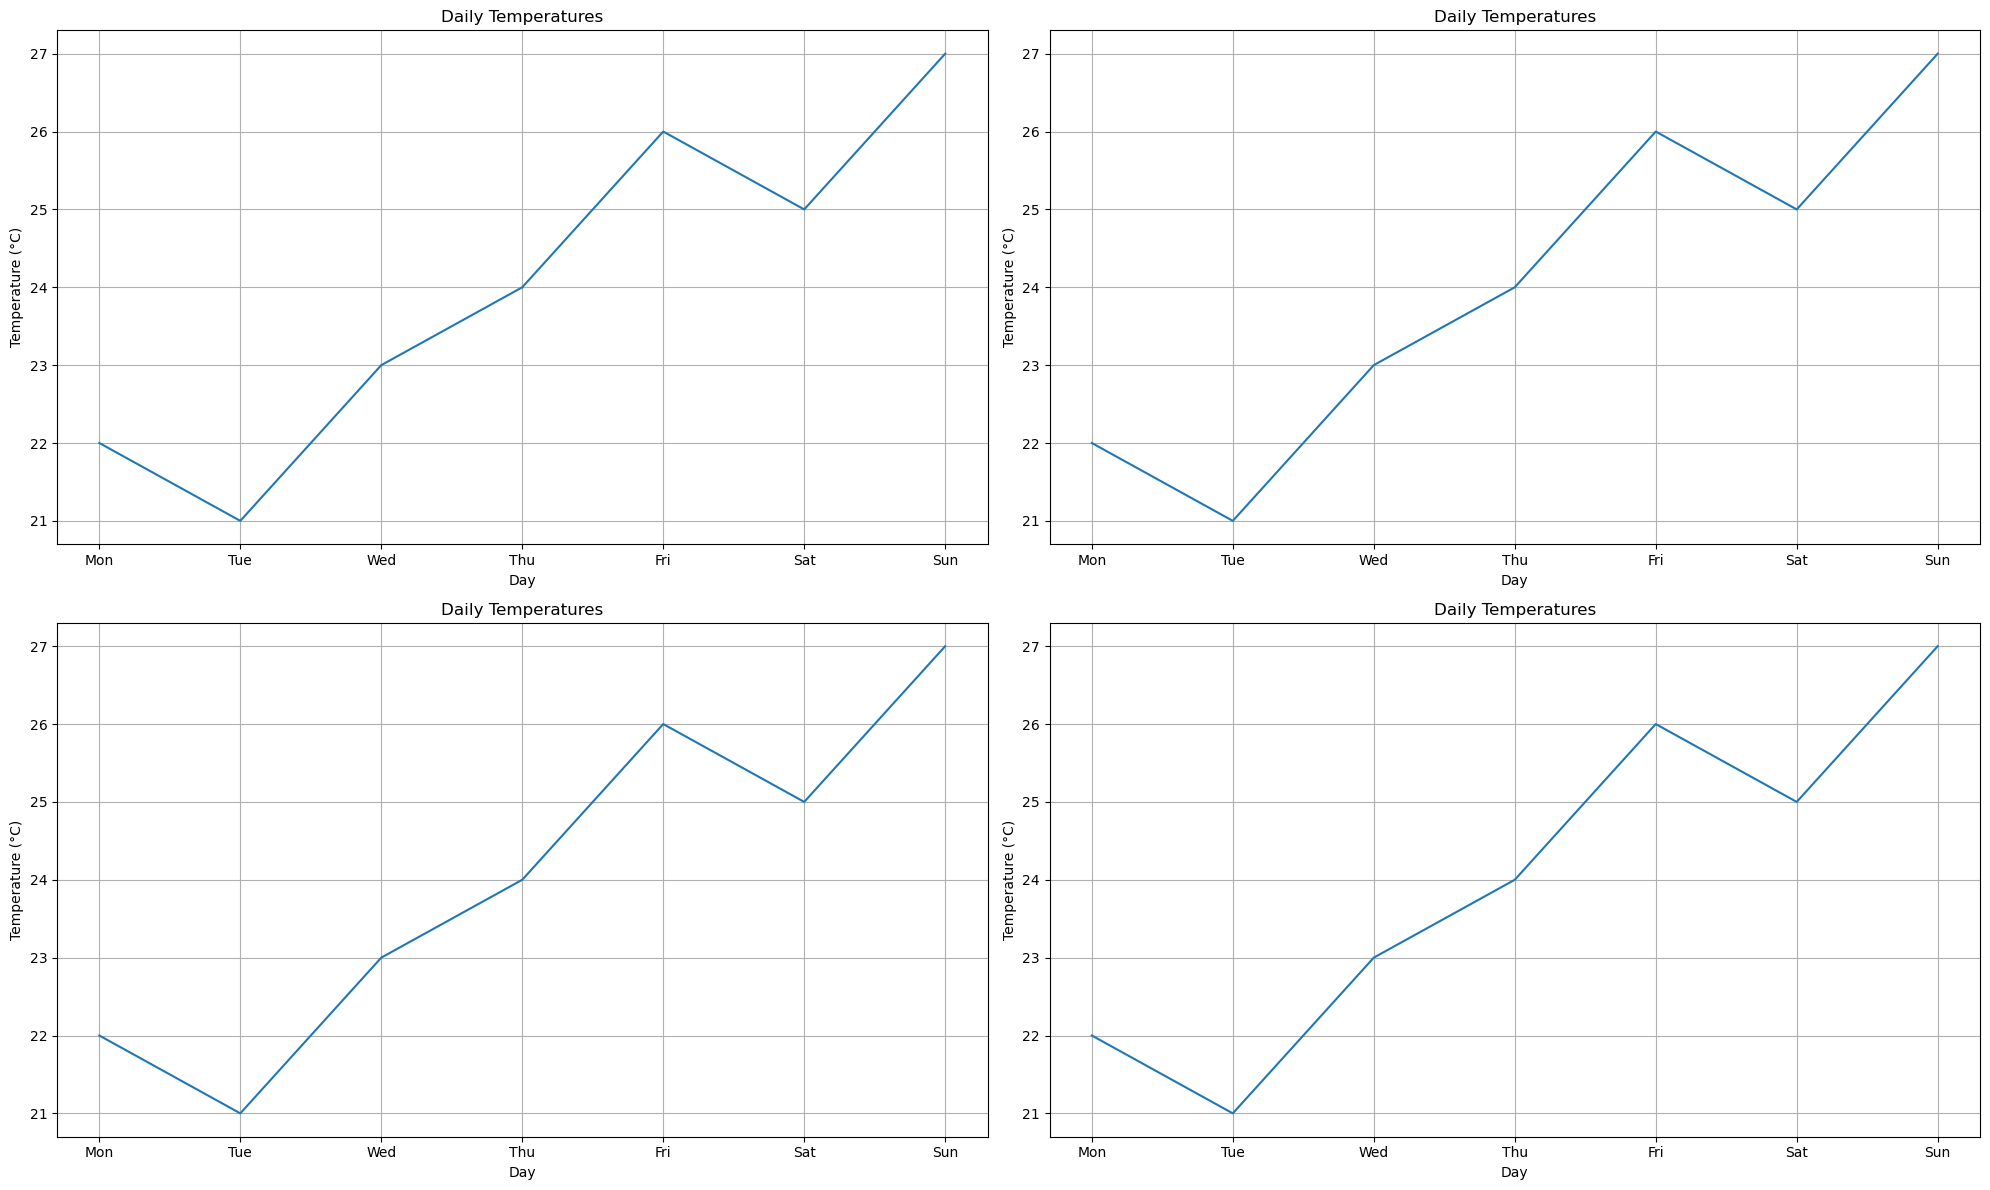

In [137]:
fig, axs =plt.subplots(2,2,figsize=(20, 12))

for ax in axs.flat:
    # Biểu đồ đường
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    temperature = [22, 21, 23, 24, 26, 25, 27]
    ax.plot(days, temperature)
    ax.set_title('Daily Temperatures')
    ax.set_xlabel('Day')
    ax.set_ylabel('Temperature (°C)')
    ax.grid(True)
plt.tight_layout()
plt.show()